In [4]:
# import quandl
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from matplotlib import pyplot as plt

# df = quandl.get("WIKI/AMZN")
df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'],)
df=df.iloc[::-1]
df.index = df['Date']
del df['Date']
df.info()
df = df[['Close']]
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2013-04-28 to 2017-11-07
Data columns (total 6 columns):
Open          1655 non-null float64
High          1655 non-null float64
Low           1655 non-null float64
Close         1655 non-null float64
Volume        1655 non-null object
Market Cap    1655 non-null object
dtypes: float64(4), object(2)
memory usage: 90.5+ KB
              Close
Date               
2017-11-03  7207.76
2017-11-04  7379.95
2017-11-05  7407.41
2017-11-06  7022.76
2017-11-07  7144.38


In [5]:
df.head(2)

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54


# 1-

C:\Users\Arian\Anaconda311\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '$(Dollar)')

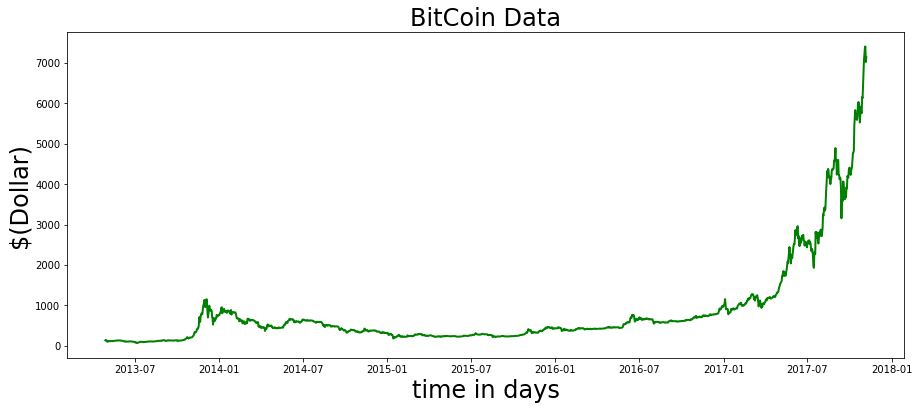

In [6]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.plot(df,color='green', lw=2)
plt.title("BitCoin Data",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

In [7]:
from sklearn.model_selection import train_test_split

df = df[['Close']]

forecast_out = int(30)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

confidence:  0.8808938586498523
[5792.47216887 5804.69482207 5859.23703279 6619.84894105 6865.4053539
 7091.68994044 6903.38507267 6961.49477796 6814.28352457 6796.11504709
 6940.5679284  7311.94288668 7336.64564115 7308.22827894 7212.48211896
 6717.59338836 6992.40080476 7181.23282808 7029.30169356 6995.20821457
 7486.51719118 7457.92819693 7872.13760886 8238.58427568 8620.08552438
 8778.55093589 8989.64608681 9023.31048569 8551.75145323 8700.85065907]


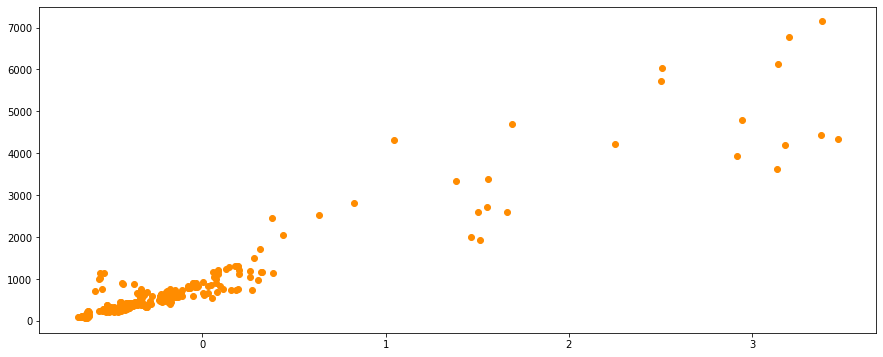

In [30]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
#plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
# plt.plot(X_test, y_test, color='darkorange', linewidth=1)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [15]:
#print(X_test)
#print(y_test)

In [16]:
#from sklearn.model_selection import cross_validate
#cross_validate = cross_validate(clf, X_train, y_train)

In [8]:
cross_validation = clf.predict(X_test)


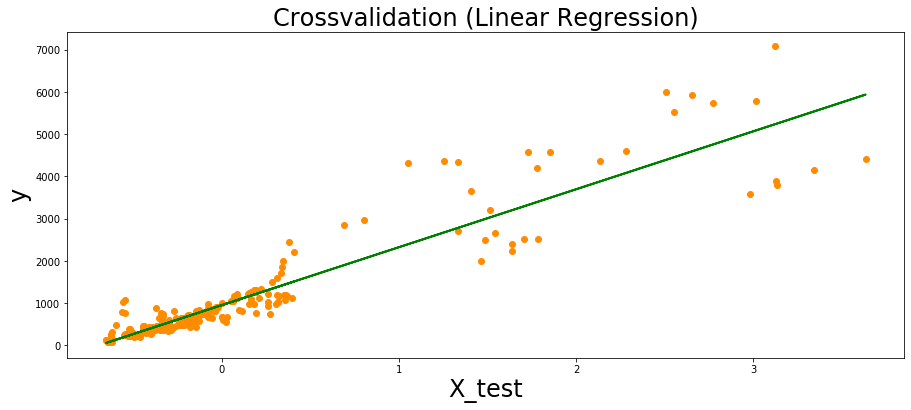

In [9]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='test_data')
plt.plot(X_test, cross_validation, color='green', linewidth=2,label='predicted data')
# plt.plot(new_df,color='green', lw=2)
plt.title("Crossvalidation (Linear Regression)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

345.2819125251636


In [33]:
last_date = df.iloc[-1].name
print(last_date)

2017-11-07 00:00:00


In [84]:
pred={}
forecast_prediction
#pred []

SyntaxError: invalid syntax (<ipython-input-84-b283fb42c998>, line 3)

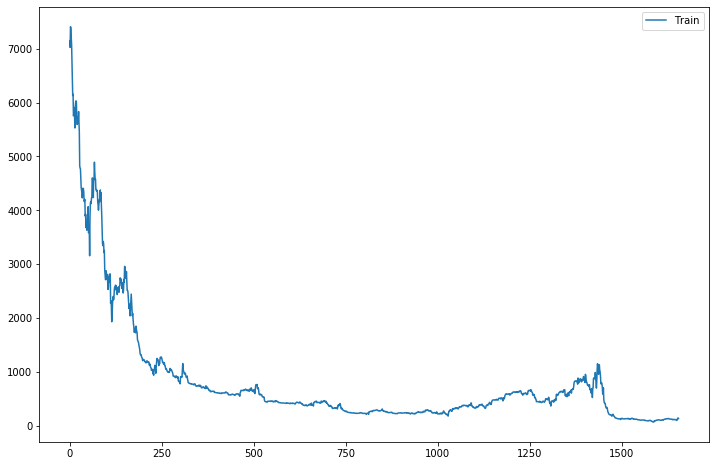

In [85]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Train')
# plt.plot(X_test['Close'], label='Test')
# plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [57]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(29), freq='D')
print(len(days),len(forecast_prediction))
df1 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df1 =df1.set_index('Date')
df1.info()
print(df.head())

30 30
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-11-07 to 2017-12-06
Data columns (total 1 columns):
Close    30 non-null float64
dtypes: float64(1)
memory usage: 480.0 bytes
             Close  Prediction
Date                          
2013-04-28  134.21       129.0
2013-04-29  144.54       132.3
2013-04-30  139.00       128.8
2013-05-01  116.99       129.0
2013-05-02  105.21       129.3


Text(0, 0.5, '$(Dollar)')

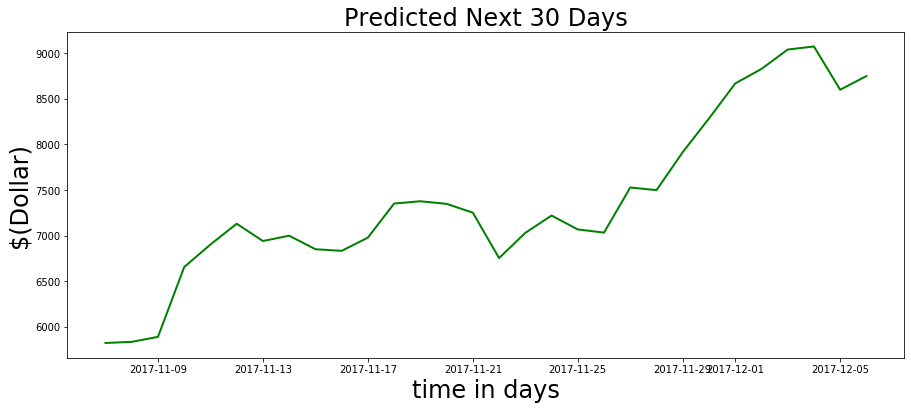

In [58]:
# # df['Close'].plot()
# df1['Close'].plot()
# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()
plt.plot(df1,color='green', lw=2)
plt.title("Predicted Next 30 Days",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

Text(0, 0.5, '$(Dollar)')

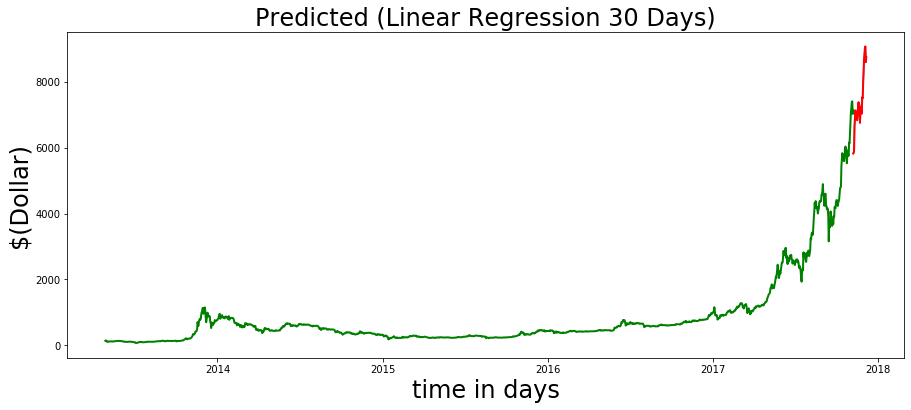

In [59]:
# plt.figure(figsize=(12,8))
# plt.plot(df['Close'], label='Train')
# plt.plot(df1['Close'], label='Predicted')
# # plt.plot(X_test['Close'], label='Test')
# # plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
# plt.legend(loc='best')
# plt.show()

plt.plot(df1,)
plt.plot(df['Close'],color='green', lw=2, label='Bitcoin Data')
plt.plot(df1['Close'],color='red', lw=2, label='Predicted')
plt.title("Predicted (Linear Regression 30 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)


# 2-# convert the date column into a time series with daily frequency


In [12]:
# df = quandl.get("WIKI/AMZN")
df11 = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'],)
#df11=df11.iloc[::-1]
df11.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-11-07,7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,2017-11-06,7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"


In [13]:
df11['Date'] = pd.to_datetime(df11['Date'])

In [14]:
indexed_df = df11.set_index('Date')

In [15]:
ts = indexed_df['Close']

In [16]:
ts.head()

Date
2017-11-07    7144.38
2017-11-06    7022.76
2017-11-05    7407.41
2017-11-04    7379.95
2017-11-03    7207.76
Name: Close, dtype: float64

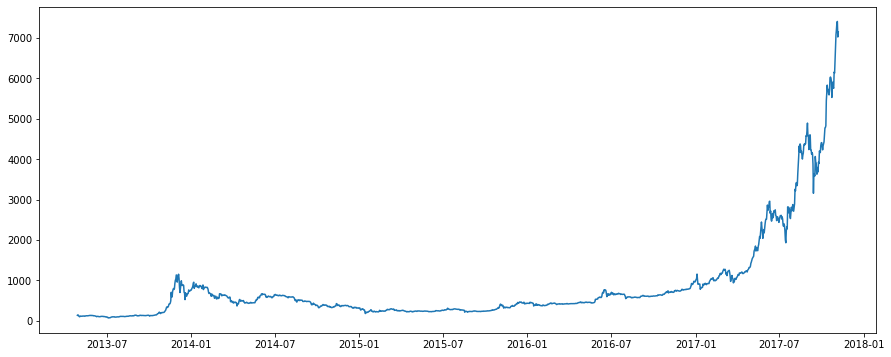

In [17]:
plt.plot(ts)

In [24]:
# resamply by week

ts_week = ts.resample('D').mean()

In [25]:
ts_week

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-11-03    7207.76
2017-11-04    7379.95
2017-11-05    7407.41
2017-11-06    7022.76
2017-11-07    7144.38
Freq: D, Name: Close, Length: 1655, dtype: float64

In [26]:
new_chau= pd.DataFrame(list(ts_week), index = ts_week.index, columns = ["close"])

In [27]:
new_chau

,close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
...,...
2017-11-03,7207.76
2017-11-04,7379.95
2017-11-05,7407.41


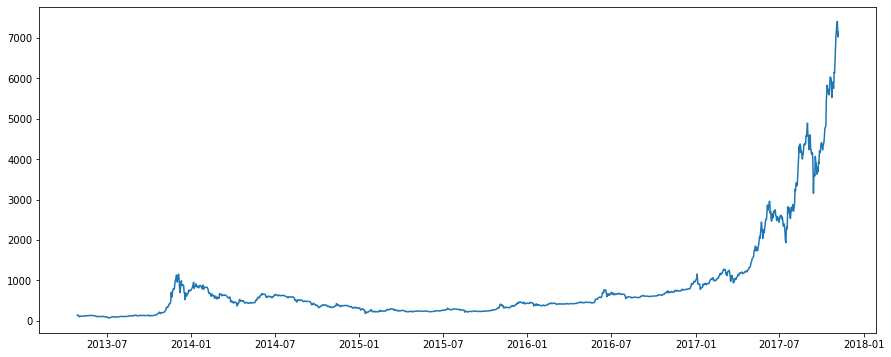

In [28]:
plt.plot(ts_week)

In [37]:
# check for stationarity

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
   # print('Results of Dickey-Fuller Test:')
    #dftest = pd.DataFrame(timeseries)
    #dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
   # for key,value in dftest[4].items():
     #   dfoutput['Critical Value (%s)'%key] = value
   # print(dfoutput)

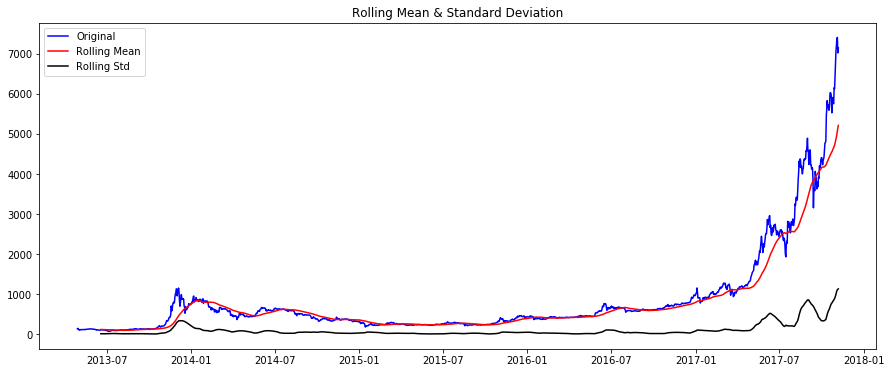

In [38]:
test_stationarity(ts_week)

Because the test statistic is more than the 5% critical value and the p-value is larger than 0.05, the moving average is not constant over time and the null hypothesis of the Dickey-Fuller test cannot be rejected. This shows that the weekly time series is not stationary.
Before you can apply ARIMA models for forecasting, you need to transform this time series into a stationary time series.

In [39]:
# apply a non linear log transform

ts_week_log = np.log(ts_week)

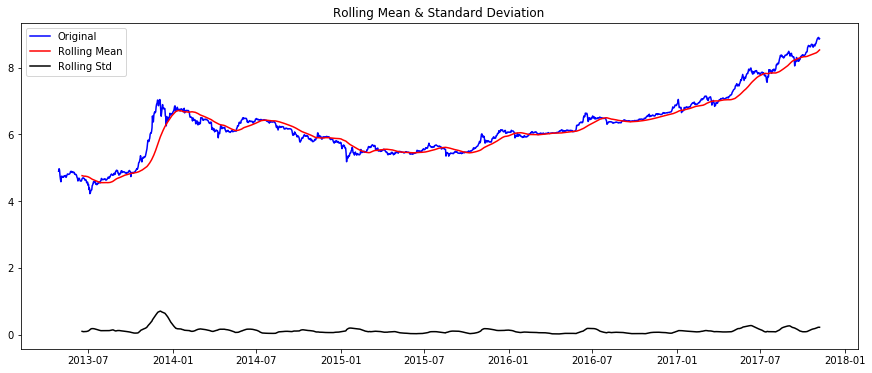

In [40]:
test_stationarity(ts_week_log)

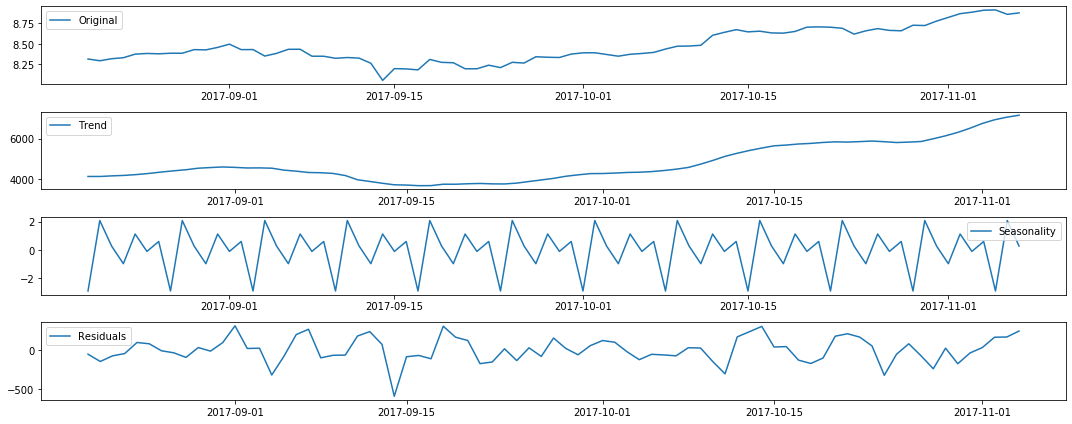

In [79]:
# remove trend and seasonality with decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_week)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_week_log[-80:], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend[-80:], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal[-80:],label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual[-80:], label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

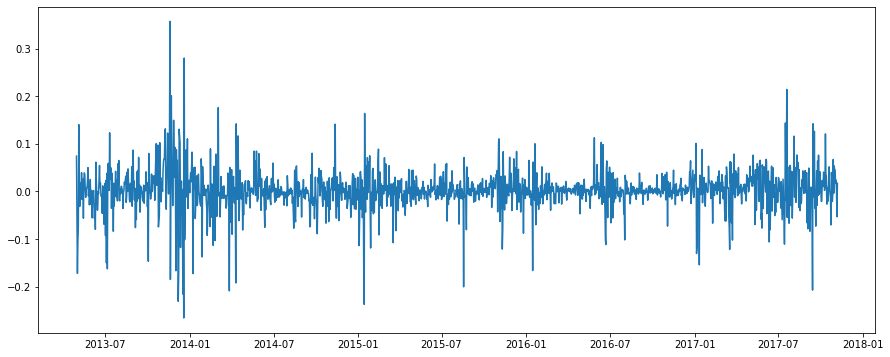

In [41]:
# remove trend and seasonality with differencing

ts_week_log_diff = ts_week_log - ts_week_log.shift()
plt.plot(ts_week_log_diff)

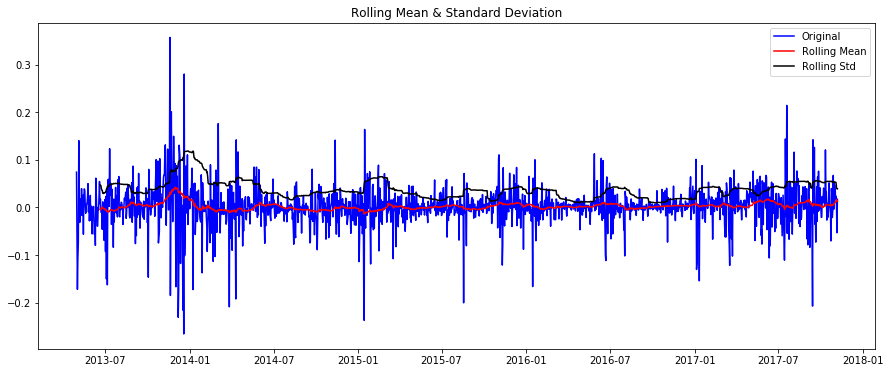

In [42]:
ts_week_log_diff.dropna(inplace=True)
test_stationarity(ts_week_log_diff)